# <b>Digital Recognition Notebook</b>

In this notebook we will look into digit recognition with the keras plug-in. We will use the MNIST data set to first train the neural network and then we will input out own image to see if it will recognise that. With this we hope that it will recognise the digit correctly and display the results to the user.

## Setting up the Neural Network

To set up the initial neural network, we'll need to use the numpy package that we've used before to store the data into an array. We also need to import the keras package to create the network.

#### Keras
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. [1]

#### Creating neural network
The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers. With this, we then add layers onto the model and configure its learning process with a compile. [2]

In [39]:
# import keras packages
# NOTE: To import the keras package you must install tensorflow - which can be found here: https://www.tensorflow.org/install/
import keras as kr

# Create the sequential model
model = kr.models.Sequential()

# Add layers to the model
model.add(kr.layers.Dense(units=1000, activation='linear', input_dim=784))
#model.add(kr.layers.Dense(units=400, activation='relu'))
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

We set up an input layer of 784 neurons, one for each value in the 28x28 array, with a hidden layer of 1000 neurons and a linear activation function.
(NOTE: the below graph shows a 100 neuron hidden layer whereas we are using a 1000 neuron hidden layer).

We set up an output layer with 10 neurons, one for each value ranging from 0-9.

<img src="https://3.bp.blogspot.com/-mDyzBzA4btg/V4_Z0f2mc7I/AAAAAAAAE3M/dtU8hT661fQWtnRC_JvIH_4qifQomZ4PACLcB/s1600/MNIST_neuralnet_image.png">
[3]

## Importing the dataset

Now that we have our neural network set up, we can import the MNIST data set so we can train our neural network. As we've done before in the MNIST notebook, we just import the gzip package to open the data set files, and store these byte values into an int array using numpy.

In [45]:
# Import the gzip and numpy packages
import gzip
import numpy as np

# This opens the images file which is located in our local directory and assigns the read in value to a variable
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    image_content = f.read()
    
# This opens the label file which is located in our local directory and assigns the read in value to a variable
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    label_content = f.read()
    
# This opens the training images file which is located in our local directory and assigns the read in value to a variable
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

# This opens the training label file which is located in our local directory and assigns the read in value to a variable
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
# Assign the training data set to a numpy array holding all the values in a 28x28 array
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
# Assign the training label data set to a numpy array
train_lbl =  np.array(list(train_lbl[8:])).astype(np.uint8)

Now that we have the training set assigned to an array, we can also assign the test set to an array. Below I will also show the bytes as 1s and 0s as an array.

In [48]:
# Assign the data set to a numpy array holding all the values in a 28x28 array
image_test = ~np.array(list(image_content[16:])).reshape(10000,28,28).astype(np.uint8)

# Assign the label data set to a numpy array
label_test =  np.array(list(label_content[8:])).astype(np.uint8)

# Display the bytes as 1s and 0s in an array
print((~image_test[0]).astype(np.bool).astype(np.uint8))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 

## Flattening the array
With our training array with a size of 60000 with a 28x28 array at each of these values we have a 3 Dimensional array. But to input our values into the neural network we need a 1 Dimensional array were all the values are sequentially stored after eachother. To do this, we just need to reshape the array again to the size we want.

In [55]:
# Reshape the 3D array into a 1D array
inputs = train_img.reshape(60000, 784)
# Print the 1D array of inputs
print(inputs)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


## Encoding the label data
The label data needs to be encoded into a matrix of 10x10. To do this we convert the data into binary format. So first we set up the binary encoder, then pass in the label values and fit them into the matrix as the label values are 0-9 so they fit into the 10x10 matrix. The labels are then transformed into the binary format, where each label number indicates the value of the number and the binary format displays its position.

In [53]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

# set up the binary encoder
encoder = pre.LabelBinarizer()
# fit the labels into the binary format
encoder.fit(train_lbl)
# Transform the labels to the binary format
outputs = encoder.transform(train_lbl)

# Print the labels position and the binary array in the same position
# Result should show the label number 5 and a 1 in the 6th position to indicate the number 5 (0-9)
print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [30]:
for i in range(10):
    print(i, encoder.transform([i]))

0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]


Now to train our neural network, we need to train it. To do this we use the keras fit() method which will train  the model for a given number of epochs (iterations on a dataset). [4]

For our model we are going to pass in four parameters:
    <li>Inputs:    
    Numpy array of training data.
    </li>
    <li>Outputs:      
    Numpy array of label data
    </li>
    <li>Epoch:      
    Number of epochs to train the model. An epoch is an 
    iteration over the entire x and y data provided. </li>
    <li>Batch_size:       
    The amount of data we want to test at one time.
    </li>
    
    
For the below example, we will use the training set that we set up above. We will have a batch size of 100 and an epoch size of 2. With our batch size quite large and such a small epoch size we dont expect to have a high accuracy as we are not training the model enough.

In [54]:
model.fit(inputs, outputs, epochs=2, batch_size=100)

Epoch 1/2
60000/60000 [==============================] - 11s 186us/step - loss: 0.8048 - acc: 0.7731
Epoch 2/2
60000/60000 [==============================] - 11s 177us/step - loss: 0.4349 - acc: 0.8781


With the above example working we can work with a bigger epoch size to get better accuracy with our results. We can also use the Matplotlib package to graph our results and see how more accurate the neural network gets every iteration (epoch).

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 9s 207us/step - loss: 0.9817 - acc: 0.7611 - val_loss: 0.5638 - val_acc: 0.8698
Epoch 2/20
45000/45000 [==============================] - 9s 197us/step - loss: 0.5144 - acc: 0.8660 - val_loss: 0.4354 - val_acc: 0.8838
Epoch 3/20
45000/45000 [==============================] - 9s 197us/step - loss: 0.4312 - acc: 0.8819 - val_loss: 0.3893 - val_acc: 0.8911
Epoch 4/20
45000/45000 [==============================] - 9s 196us/step - loss: 0.3911 - acc: 0.8905 - val_loss: 0.3630 - val_acc: 0.8959
Epoch 5/20
45000/45000 [==============================] - 9s 196us/step - loss: 0.3672 - acc: 0.8955 - val_loss: 0.3521 - val_acc: 0.8978
Epoch 6/20
45000/45000 [==============================] - 9s 202us/step - loss: 0.3513 - acc: 0.8995 - val_loss: 0.3284 - val_acc: 0.9066
Epoch 7/20
45000/45000 [==============================] - 9s 197us/step - loss: 0.3374 - acc: 0.9032 - val_loss: 0.3231 - 

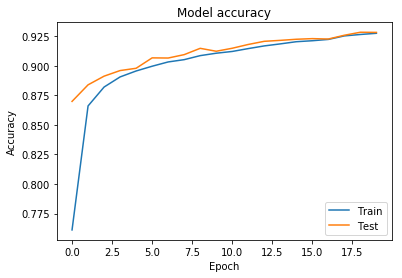

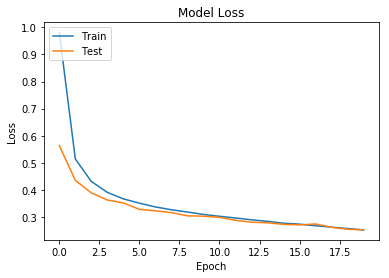

In [38]:
# Import the matplotlib package
import matplotlib.pyplot as plt

# Train the model and assign it to a variable so we can use it to plot our data
training = model.fit(inputs, outputs, epochs=20, batch_size=100, verbose=1)

# Plot training & validation accuracy values
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
model.predict(test_img[5:6])

array([[1.5429021e-05, 9.6844000e-01, 1.1015500e-02, 7.7242730e-03,
        7.3000447e-05, 3.0352670e-04, 2.1726568e-04, 4.9345144e-03,
        5.9866104e-03, 1.2898021e-03]], dtype=float32)

In [6]:
%run -i "Digit-Recog.py"

Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.8039 - acc: 0.7746
Epoch 2/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.4392 - acc: 0.8771
Epoch 3/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.3871 - acc: 0.8889
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.3626 - acc: 0.8960
Epoch 5/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.3468 - acc: 0.8999
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3365 - acc: 0.9016
Epoch 7/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3276 - acc: 0.9049
Epoch 8/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.3220 - acc: 0.9070
Epoch 9/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3165 - acc: 0.9086
Epoch 10/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.3129 -

Please Select a menu option: 1 - Test 10 random images from the test set 1


Test Number :  1 

The random index:  8741 

The result array: 
[[2.4989746e-03 3.9605013e-05 3.9294519e-05 3.7513408e-03 3.0021943e-07
  9.7797865e-01 9.7309705e-05 1.5302058e-08 1.5579022e-02 1.5513157e-05]] 

The networks prediction: =>>  [5]
The actual number: =>>  [5]
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Test Number :  2 

The random index:  9801 

The result array: 
[[9.9927634e-01 8.9573921e-15 2.0953707e-10 3.2695172e-10 1.3397344e-12
  7.2278408e-04 4.8219203e-08 2.1058385e-15 8.2795117e-07 1.5142285e-12]] 

The networks prediction: =>>  [0]
The actual number: =>>  [0]
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Test Number :  3 

The random index:  4107 

The result array: 
[[3.4203054e-05 1.7380265e-06 9.7490745e-03 5.0284350e-03 1.8595683e-05
  2.8155724e-04 1.1009332e-05 9.5699888e-01 1.1053804e-03 2.6771160e-02]] 

The networks prediction: =>>  [7]
The actual number: =>>  [7]
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Test Number :  4 

The random index: 

## References
<ul>
    <li><a href="https://keras.io/">Keras Documentation</a> [1]</li>
    <li><a href="https://keras.io/#getting-started-30-seconds-to-keras">Keras Getting started</a> [2]</li>
    <li><a href="http://db-blog.web.cern.ch/fr/node/98">Neural Network Visual</a> [3]</li>
    <li><a href="https://keras.io/models/sequential/">Keras Sequential model API</a> [4]</li>
    <li><a href=""></a></li>
</ul>